In [1]:
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
from os.path import expandvars
import numpy as np
import matplotlib.pylab as plt
import argparse
from scipy import stats
from scipy.optimize import minimize
from scipy.stats.distributions import chi2
import scipy
from RecoPulseLikelihoodRatio import likelihoodfit
from likelihoodHelpers import log_likelihood_biGauss, log_likelihood_doublePeak, likelihood_ratio_doublePeak, likelihood_ratio_biGauss, biGauss, double_peak
import csv

In [5]:
read_file = open('/data/p-one/akatil/analysis/RecoPulses/RecoPulseFitInfo_correcectedchi2.csv', 'r')

file_num, frame_num, lepton, DOM, string = ([]), ([]), ([]), ([]), ([])
binEntries_mean, success_biGauss, success_doublePeak = ([]), ([]), ([])
biGauss_pos, biGauss_wid, biGauss_rat, biGauss_amp = ([]), ([]), ([]), ([])
doublePeak_amp1, doublePeak_amp2, doublePeak_pos1, doublePeak_pos2 = ([]), ([]), ([]), ([])
doublePeak_rat1, doublePeak_rat2, doublePeak_wid1, doublePeak_wid2 = ([]), ([]), ([]), ([])
area_data, area_biGauss_fit, area_doublePeak_fit = ([]), ([]), ([])
gof_biGauss, gof_doublePeak = ([]), ([])
with read_file:

    reader = csv.DictReader(read_file)
    
    for row in reader:
        file_num = np.append(file_num, row['file'])
        frame_num = np.append(frame_num, row['frame'])
        lepton =np.append(lepton, row['lepton_type'])
        DOM = np.append(DOM, row['DOM']) #DOM and string have been interchanged
        string = np.append(string, row['string'])
        binEntries_mean = np.append(binEntries_mean, float(row['binEntries_mean']))
        success_biGauss = np.append(success_biGauss, row['success_biGauss'])
        success_doublePeak = np.append(success_doublePeak, row['success_doublePeak'])
        biGauss_pos = np.append(biGauss_pos, float(row['biGauss_pos']))
        biGauss_wid = np.append(biGauss_wid, float(row['biGauss_wid']))
        biGauss_rat = np.append(biGauss_rat, float(row['biGauss_rat']))
        biGauss_amp = np.append(biGauss_amp, float(row['biGauss_amp']))
        doublePeak_pos1 = np.append(doublePeak_pos1, float(row['doublePeak_pos1']))
        doublePeak_wid1 = np.append(doublePeak_wid1, float(row['doublePeak_wid1']))
        doublePeak_rat1 = np.append(doublePeak_rat1, float(row['doublePeak_rat1']))
        doublePeak_amp1 = np.append(doublePeak_amp1, float(row['doublePeak_amp1']))
        doublePeak_pos2 = np.append(doublePeak_pos2, float(row['doublePeak_pos2']))
        doublePeak_wid2 = np.append(doublePeak_wid2, float(row['doublePeak_wid2']))
        doublePeak_rat2 = np.append(doublePeak_rat2, float(row['doublePeak_rat2']))
        doublePeak_amp2 = np.append(doublePeak_amp2, float(row['doublePeak_amp2']))
        area_data = np.append(area_data, float(row['area_data']))
        area_biGauss_fit = np.append(area_biGauss_fit, float(row['area_biGauss_fit']))
        area_doublePeak_fit = np.append(area_doublePeak_fit, float(row['area_doublePeak_fit']))
        gof_biGauss = np.append(gof_biGauss, float(row['gof_biGauss']))
        gof_doublePeak = np.append(gof_doublePeak, float(row['gof_doublePeak']))

In [6]:
'''
Selecting DOMs with goodness of fit < 2, only double peak fit chi2 values are considered
'''
gof_bool_biGauss = (gof_biGauss > 0)&(gof_biGauss < 2)
gof_bool_dp = (gof_doublePeak > 0)&(gof_doublePeak < 2)

select_gof_biGauss = gof_biGauss[gof_bool_dp]
select_gof_dp = gof_doublePeak[gof_bool_dp]
select_file_num = file_num[gof_bool_dp]
select_frame_num = frame_num[gof_bool_dp]
select_string = DOM[gof_bool_dp]
select_DOM = string[gof_bool_dp]

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [7]:
gof_biGauss

array([12.9562574 ,  1.94526641,  9.48373854, ..., 14.77778603,
       10.41280474,  8.01624411])

1392
OMKey(9,19,0)
Now Histogramming
1420
OMKey(2,4,0)
Now Histogramming
1461
OMKey(4,4,0)
Now Histogramming
1465
OMKey(4,5,0)
Now Histogramming
1470
OMKey(8,18,0)
Now Histogramming
1548
OMKey(5,1,0)
Now Histogramming
1587
OMKey(3,10,0)
Now Histogramming
1626
OMKey(7,17,0)
Now Histogramming
('PARAMETERS -', 205.4844022069717, 256.96501592267566, 204.18885740713324, 75.27315573596296, 227.74341719616234, 187.21449367119305, 198.1133914139616, -567.6643581165962)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -0.72855826,  20.        ,   1.        , 199.        ,
        24.48444198,  20.        ,   1.        , 199.        ]), -1422.7739802932583)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -0.72855826,  20.        ,   1.        , 199.        ,
        24.48444198,  20.        ,   1.        , 199.        ]), -1422.7739802932583)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  0.27144174,  20.       

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:140: RuntimeWarning: invalid value encountered in log


('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  -1.72904759,   25.77390288,    0.81295282,  161.0140373 ,
         37.21122967,   20.67890562,    0.95099269, -213.43016064]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  -1.72904759,   25.86407283,    0.81295282,  161.0140373 ,
         37.21122967,   20.67890562,    0.95099269, -213.43016064]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  -1.72904759,   25.91980093,    0.81295282,  161.0140373 ,
         37.21122967,   20.67890562,    0.95099269, -213.43016064]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  -1.72904759,   25.95424278,    0.81295282,  161.0140373 ,
         37.21122967,   20.67890562,    0.95099269, -213.43016064]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  -1.72904759,   25.97986584,    0.81295282,  161.0140373 ,
         37.21122967,   20.67

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   0.85888137,   28.5677948 ,    5.98881075,  164.60196626,
         39.79915864,   23.26683458,    3.53892166, -210.84223168]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   0.85888137,   28.5677948 ,    5.98881075,  165.22000023,
         39.79915864,   23.26683458,    3.53892166, -210.84223168]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   0.85888137,   28.5677948 ,    5.98881075,  165.60196624,
         39.79915864,   23.26683458,    3.53892166, -210.84223168]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   0.85888137,   28.5677948 ,    5.98881075,  165.83803422,
         39.79915864,   23.26683458,    3.53892166, -210.84223168]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   0.85888137,   28.5677948 ,    5.98881075,  165.98393226,
         39.79915864,   23.26

         44.97501656,   25.85476354,    6.12685062, -208.25430272]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   3.44681033,   31.15572377,    8.57673971,  168.77782418,
         44.97501656,   26.85476354,    6.12685062, -208.25430272]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   3.44681033,   31.15572377,    8.57673971,  168.77782418,
         44.97501656,   28.47279754,    6.12685062, -208.25430272]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   3.44681033,   31.15572377,    8.57673971,  168.77782418,
         44.97501656,   26.85476354,    6.12685062, -208.25430272]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   3.44681033,   31.15572377,    8.57673971,  168.77782418,
         44.97501656,   27.47279751,    6.12685062, -208.25430272]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   3.44681033, 

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   6.03473929,   33.74365273,   11.16466867,  171.36575314,
         47.56294552,   31.0607265 ,    8.71477958, -205.66637376]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   6.03473929,   33.74365273,   11.16466867,  171.36575314,
         47.56294552,   29.4426925 ,    8.71477958, -205.66637376]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   6.03473929,   33.74365273,   11.16466867,  171.36575314,
         47.56294552,   30.06072647,    8.71477958, -205.66637376]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   6.03473929,   33.74365273,   11.16466867,  171.36575314,
         47.56294552,   30.44269248,    8.71477958, -205.66637376]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   6.03473929,   33.74365273,   11.16466867,  171.36575314,
         47.56294552,   30.67

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   8.62266826,   36.33158169,   13.75259763,  173.9536821 ,
         50.15087448,   33.41258746,   11.30270854, -203.0784448 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   8.62266826,   36.33158169,   13.75259763,  173.9536821 ,
         50.15087448,   33.50275741,   11.30270854, -203.0784448 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   8.62266826,   36.33158169,   13.75259763,  173.9536821 ,
         50.15087448,   33.55848551,   11.30270854, -203.0784448 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   8.62266826,   36.33158169,   13.75259763,  173.9536821 ,
         50.15087448,   33.59292736,   11.30270854, -203.0784448 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   8.62266826,   36.33158169,   13.75259763,  173.9536821 ,
         50.15087448,   33.61

         52.73880344,   36.20647938,   16.5086715 , -200.49051584]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  11.21059722,   38.91951065,   16.34052659,  176.54161107,
         52.73880344,   36.20647938,   14.8906375 , -200.49051584]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  11.21059722,   38.91951065,   16.34052659,  176.54161107,
         52.73880344,   36.20647938,   15.50867148, -200.49051584]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  11.21059722,   38.91951065,   16.34052659,  176.54161107,
         52.73880344,   36.20647938,   15.89063749, -200.49051584]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  11.21059722,   38.91951065,   16.34052659,  176.54161107,
         52.73880344,   36.20647938,   16.12670547, -200.49051584]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  11.21059722, 

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  13.79852618,   41.50743961,   18.92845556,  179.12954003,
         55.32673241,   37.82451336,   16.47856646, -197.90258687]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  13.79852618,   41.50743961,   18.92845556,  179.12954003,
         55.32673241,   38.20647937,   16.47856646, -197.90258687]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  13.79852618,   41.50743961,   18.92845556,  179.12954003,
         55.32673241,   38.44254735,   16.47856646, -197.90258687]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  13.79852618,   41.50743961,   18.92845556,  179.12954003,
         55.32673241,   38.58844539,   16.47856646, -197.90258687]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  13.79852618,   41.50743961,   18.92845556,  179.12954003,
         55.32673241,   38.67

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  16.38645514,   44.09536857,   21.51638452,  181.71746899,
         57.32673239,   38.79440835,   19.06649542, -195.31465791]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  16.38645514,   44.09536857,   21.51638452,  181.71746899,
         57.56280037,   38.79440835,   19.06649542, -195.31465791]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  16.38645514,   44.09536857,   21.51638452,  181.71746899,
         57.70869841,   38.79440835,   19.06649542, -195.31465791]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  16.38645514,   44.09536857,   21.51638452,  181.71746899,
         57.79886836,   38.79440835,   19.06649542, -195.31465791]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  16.38645514,   44.09536857,   21.51638452,  181.71746899,
         57.85459645,   38.79

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  18.9743841 ,   46.68329753,   24.10431348,  184.09943499,
         57.91466137,   41.38233731,   21.65442439, -192.72672895]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  18.9743841 ,   46.68329753,   24.10431348,  184.18960494,
         57.91466137,   41.38233731,   21.65442439, -192.72672895]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  18.9743841 ,   46.68329753,   24.10431348,  184.24533303,
         57.91466137,   41.38233731,   21.65442439, -192.72672895]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  18.9743841 ,   46.68329753,   24.10431348,  184.27977489,
         57.91466137,   41.38233731,   21.65442439, -192.72672895]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  18.9743841 ,   46.68329753,   24.10431348,  184.30539795,
         57.91466137,   41.38

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  21.56231306,   49.2712265 ,   26.69224244,  186.54146591,
         60.50259033,   43.97026627,   24.24235335, -190.13879999]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  21.56231306,   49.2712265 ,   26.69224244,  186.68736395,
         60.50259033,   43.97026627,   24.24235335, -190.13879999]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  21.56231306,   49.2712265 ,   26.69224244,  186.7775339 ,
         60.50259033,   43.97026627,   24.24235335, -190.13879999]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  21.56231306,   49.2712265 ,   26.69224244,  186.833262  ,
         60.50259033,   43.97026627,   24.24235335, -190.13879999]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  21.56231306,   49.2712265 ,   26.69224244,  186.86770385,
         60.50259033,   43.97

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  24.15024202,   51.85915546,   29.2801714 ,  188.51136089,
         63.09051929,   46.55819523,   26.83028231, -187.55087103]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  24.15024202,   51.85915546,   29.2801714 ,  188.8933269 ,
         63.09051929,   46.55819523,   26.83028231, -187.55087103]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  24.15024202,   51.85915546,   29.2801714 ,  189.12939488,
         63.09051929,   46.55819523,   26.83028231, -187.55087103]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  24.15024202,   51.85915546,   29.2801714 ,  189.27529291,
         63.09051929,   46.55819523,   26.83028231, -187.55087103]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  24.15024202,   51.85915546,   29.2801714 ,  189.36546286,
         63.09051929,   46.55

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  26.73817099,   54.44708442,   31.86810036,  189.48125587,
         65.67844825,   49.14612419,   29.41821127, -184.96294207]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  26.73817099,   54.44708442,   31.86810036,  189.48125587,
         65.67844825,   49.14612419,   29.41821127, -184.96294207]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  26.73817099,   54.44708442,   31.86810036,  190.48125587,
         65.67844825,   49.14612419,   29.41821127, -184.96294207]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  26.73817099,   54.44708442,   31.86810036,  192.09928987,
         65.67844825,   49.14612419,   29.41821127, -184.96294207]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  26.73817099,   54.44708442,   31.86810036,  190.48125587,
         65.67844825,   49.14

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  29.32609995,   57.03501338,   34.34023632,  192.06918483,
         68.26637721,   51.73405315,   32.00614023, -182.3750131 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  29.32609995,   57.03501338,   34.39596441,  192.06918483,
         68.26637721,   51.73405315,   32.00614023, -182.3750131 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  29.32609995,   57.03501338,   34.43040627,  192.06918483,
         68.26637721,   51.73405315,   32.00614023, -182.3750131 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  29.32609995,   57.03501338,   34.45602932,  192.06918483,
         68.26637721,   51.73405315,   32.00614023, -182.3750131 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  29.32609995,   57.03501338,   34.45602932,  192.06918483,
         68.26637721,   51.73

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  31.91402891,   59.62294234,   36.0740633 ,  194.6571138 ,
         70.85430617,   54.32198212,   34.59406919, -179.78708414]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  31.91402891,   59.62294234,   36.45602931,  194.6571138 ,
         70.85430617,   54.32198212,   34.59406919, -179.78708414]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  31.91402891,   59.62294234,   36.69209729,  194.6571138 ,
         70.85430617,   54.32198212,   34.59406919, -179.78708414]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  31.91402891,   59.62294234,   36.83799533,  194.6571138 ,
         70.85430617,   54.32198212,   34.59406919, -179.78708414]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  31.91402891,   59.62294234,   36.92816528,  194.6571138 ,
         70.85430617,   54.32

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  34.50195787,   62.2108713 ,   39.63188725,  199.48111072,
         73.44223514,   56.90991108,   37.18199816, -177.19915518]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  34.50195787,   62.2108713 ,   39.63188725,  199.62700876,
         73.44223514,   56.90991108,   37.18199816, -177.19915518]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  34.50195787,   62.2108713 ,   39.63188725,  199.71717871,
         73.44223514,   56.90991108,   37.18199816, -177.19915518]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  34.50195787,   62.2108713 ,   39.63188725,  199.7729068 ,
         73.44223514,   56.90991108,   37.18199816, -177.19915518]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  34.50195787,   62.2108713 ,   39.63188725,  199.80734866,
         73.44223514,   56.90

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  37.08988683,   64.79880027,   42.21981621,  202.42090068,
         78.03016408,   59.49784004,   39.76992712, -174.61122622]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  37.08988683,   64.79880027,   42.21981621,  202.42090068,
         78.26623206,   59.49784004,   39.76992712, -174.61122622]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  37.08988683,   64.79880027,   42.21981621,  202.42090068,
         78.4121301 ,   59.49784004,   39.76992712, -174.61122622]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  37.08988683,   64.79880027,   42.21981621,  202.42090068,
         78.50230005,   59.49784004,   39.76992712, -174.61122622]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  37.08988683,   64.79880027,   42.21981621,  202.42090068,
         78.55802814,   59.49

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  39.67781579,   67.38672923,   44.80774517,  205.00882964,
         81.00005906,   62.085769  ,   42.35785608, -172.02329726]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  39.67781579,   67.38672923,   44.80774517,  205.00882964,
         81.09022901,   62.085769  ,   42.35785608, -172.02329726]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  39.67781579,   67.38672923,   44.80774517,  205.00882964,
         81.14595711,   62.085769  ,   42.35785608, -172.02329726]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  39.67781579,   67.38672923,   44.80774517,  205.00882964,
         81.18039896,   62.085769  ,   42.35785608, -172.02329726]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  39.67781579,   67.38672923,   44.80774517,  205.00882964,
         81.20602202,   62.08

         83.44208999,   64.67369796,   44.94578504, -169.4353683 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  42.26574476,   69.97465819,   47.39567413,  207.5967586 ,
         83.58798802,   64.67369796,   44.94578504, -169.4353683 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  42.26574476,   69.97465819,   47.39567413,  207.5967586 ,
         83.67815797,   64.67369796,   44.94578504, -169.4353683 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  42.26574476,   69.97465819,   47.39567413,  207.5967586 ,
         83.73388607,   64.67369796,   44.94578504, -169.4353683 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  42.26574476,   69.97465819,   47.39567413,  207.5967586 ,
         83.76832792,   64.67369796,   44.94578504, -169.4353683 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  42.26574476, 

         85.79395097,   67.26162692,   47.533714  , -166.84743934]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  44.85367372,   72.56258715,   49.98360309,  210.18468757,
         86.03001895,   67.26162692,   47.533714  , -166.84743934]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  44.85367372,   72.56258715,   49.98360309,  210.18468757,
         86.17591699,   67.26162692,   47.533714  , -166.84743934]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  44.85367372,   72.56258715,   49.98360309,  210.18468757,
         86.26608693,   67.26162692,   47.533714  , -166.84743934]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  44.85367372,   72.56258715,   49.98360309,  210.18468757,
         86.32181503,   67.26162692,   47.533714  , -166.84743934]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  44.85367372, 

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  47.44160268,   75.15051611,   52.57153206,  212.77261653,
         88.38187993,   69.84955588,   50.12164296, -164.25951037]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  47.44160268,   75.15051611,   52.57153206,  212.77261653,
         88.61794791,   69.84955588,   50.12164296, -164.25951037]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  47.44160268,   75.15051611,   52.57153206,  212.77261653,
         88.76384595,   69.84955588,   50.12164296, -164.25951037]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  47.44160268,   75.15051611,   52.57153206,  212.77261653,
         88.8540159 ,   69.84955588,   50.12164296, -164.25951037]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  47.44160268,   75.15051611,   52.57153206,  212.77261653,
         88.90974399,   69.84

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  50.02953164,   77.73844507,   55.15946102,  215.36054549,
         91.20587687,   72.43748485,   52.70957192, -161.67158141]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  50.02953164,   77.73844507,   55.15946102,  215.36054549,
         91.35177491,   72.43748485,   52.70957192, -161.67158141]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  50.02953164,   77.73844507,   55.15946102,  215.36054549,
         91.44194486,   72.43748485,   52.70957192, -161.67158141]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  50.02953164,   77.73844507,   55.15946102,  215.36054549,
         91.49767295,   72.43748485,   52.70957192, -161.67158141]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  50.02953164,   77.73844507,   55.15946102,  215.36054549,
         91.53211481,   72.43

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  52.6174606 ,   80.32637403,   57.74738998,  217.94847445,
         93.79380583,   75.02541381,   55.29750089, -159.08365245]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  52.6174606 ,   80.32637403,   57.74738998,  217.94847445,
         93.93970387,   75.02541381,   55.29750089, -159.08365245]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  52.6174606 ,   80.32637403,   57.74738998,  217.94847445,
         94.02987382,   75.02541381,   55.29750089, -159.08365245]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  52.6174606 ,   80.32637403,   57.74738998,  217.94847445,
         94.08560191,   75.02541381,   55.29750089, -159.08365245]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  52.6174606 ,   80.32637403,   57.74738998,  217.94847445,
         94.12004377,   75.02

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  55.20538956,   82.914303  ,   60.33531894,  220.53640341,
         96.52763283,   77.61334277,   57.88542985, -156.49572349]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  55.20538956,   82.914303  ,   60.33531894,  220.53640341,
         96.61780278,   77.61334277,   57.88542985, -156.49572349]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  55.20538956,   82.914303  ,   60.33531894,  220.53640341,
         96.67353087,   77.61334277,   57.88542985, -156.49572349]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  55.20538956,   82.914303  ,   60.33531894,  220.53640341,
         96.70797273,   77.61334277,   57.88542985, -156.49572349]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  55.20538956,   82.914303  ,   60.33531894,  220.53640341,
         96.73359579,   77.61

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  57.79331852,   85.50223196,   62.9232479 ,  223.12433237,
         99.11556179,   80.20127173,   60.47335881, -153.90779453]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  57.79331852,   85.50223196,   62.9232479 ,  223.12433237,
         99.20573174,   80.20127173,   60.47335881, -153.90779453]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  57.79331852,   85.50223196,   62.9232479 ,  223.12433237,
         99.26145984,   80.20127173,   60.47335881, -153.90779453]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  57.79331852,   85.50223196,   62.9232479 ,  223.12433237,
         99.29590169,   80.20127173,   60.47335881, -153.90779453]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  57.79331852,   85.50223196,   62.9232479 ,  223.12433237,
         99.32152475,   80.20

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  60.38124749,   88.09016092,   65.51117686,  225.71226133,
         99.32152475,   82.78920069,   63.06128777, -151.31986557]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  60.38124749,   88.09016092,   65.51117686,  225.71226133,
        100.32152475,   82.78920069,   63.06128777, -151.31986557]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  60.38124749,   88.09016092,   65.51117686,  225.71226133,
        101.93955875,   82.78920069,   63.06128777, -151.31986557]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  60.38124749,   88.09016092,   65.51117686,  225.71226133,
        100.32152475,   82.78920069,   63.06128777, -151.31986557]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  60.38124749,   88.09016092,   65.51117686,  225.71226133,
        100.93955873,   82.78

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  61.39171118,   90.67808988,   68.09910583,  228.33029533,
        101.90945371,   85.37712965,   65.64921673, -148.7319366 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  61.39171118,   90.67808988,   68.09910583,  226.71226133,
        101.90945371,   85.37712965,   65.64921673, -148.7319366 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  61.39171118,   90.67808988,   68.09910583,  227.33029531,
        101.90945371,   85.37712965,   65.64921673, -148.7319366 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  61.39171118,   90.67808988,   68.09910583,  227.71226132,
        101.90945371,   85.37712965,   65.64921673, -148.7319366 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  61.39171118,   90.67808988,   68.09910583,  227.9483293 ,
        101.90945371,   85.37

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  83.75653585,  107.11444569,   70.98579965,  101.19468995,
         96.06048138,   87.96505862,   68.23714569, -146.14400764]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  83.75653585,  107.11444569,   70.98579965,  101.19468995,
         91.84618954,   87.96505862,   68.23714569, -146.14400764]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  83.75653585,  107.11444569,   70.98579965,  101.19468995,
         89.2416139 ,   87.96505862,   68.23714569, -146.14400764]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  83.75653585,  107.11444569,   70.98579965,  101.19468995,
         87.6318976 ,   87.96505862,   68.23714569, -146.14400764]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  83.75653585,  107.11444569,   70.98579965,  101.19468995,
         86.6370382 ,   87.96

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  86.34446481,  109.70237465,   73.57372861,  103.78261891,
         87.99525327,   91.55298758,   70.82507466, -143.55607868]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  86.34446481,  109.70237465,   73.57372861,  103.78261891,
         87.99525327,   93.17102158,   70.82507466, -143.55607868]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  86.34446481,  109.70237465,   73.57372861,  103.78261891,
         87.99525327,   91.55298758,   70.82507466, -143.55607868]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  86.34446481,  109.70237465,   73.57372861,  103.78261891,
         87.99525327,   92.17102155,   70.82507466, -143.55607868]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  86.34446481,  109.70237465,   73.57372861,  103.78261891,
         87.99525327,   92.55

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  88.93239377,  112.29030361,   76.16165757,  106.37054787,
         90.58318223,   95.70322244,   73.41300362, -140.96814972]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  88.93239377,  112.29030361,   76.16165757,  106.37054787,
         90.58318223,   95.7288455 ,   73.41300362, -140.96814972]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  88.93239377,  112.29030361,   76.16165757,  106.37054787,
         90.58318223,   95.7288455 ,   73.41300362, -140.96814972]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  88.93239377,  112.29030361,   76.16165757,  106.37054787,
         90.58318223,   95.7288455 ,   74.41300362, -140.96814972]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  88.93239377,  112.29030361,   76.16165757,  106.37054787,
         90.58318223,   95.72

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  91.52032273,  114.87823257,   78.74958653,  108.95847684,
         93.1711112 ,   98.31677446,   78.58886154, -138.38022076]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  91.52032273,  114.87823257,   78.74958653,  108.95847684,
         93.1711112 ,   98.31677446,   78.58886154, -137.38022076]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  91.52032273,  114.87823257,   78.74958653,  108.95847684,
         93.1711112 ,   98.31677446,   78.58886154, -135.76218676]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  91.52032273,  114.87823257,   78.74958653,  108.95847684,
         93.1711112 ,   98.31677446,   78.58886154, -137.38022076]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  91.52032273,  114.87823257,   78.74958653,  108.95847684,
         93.1711112 ,   98.31

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  96.69618065,  120.0540905 ,   83.92544446,  114.13433476,
         98.34696912,  103.49263238,   83.76471946, -130.61643387]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  94.10825169,  117.46616154,   81.3375155 ,  111.5464058 ,
         95.75904016,  100.90470342,   81.1767905 , -133.20436284]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  95.10825169,  117.46616154,   81.3375155 ,  111.5464058 ,
         95.75904016,  100.90470342,   81.1767905 , -133.20436284]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  96.72628569,  117.46616154,   81.3375155 ,  111.5464058 ,
         95.75904016,  100.90470342,   81.1767905 , -133.20436284]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  95.10825169,  117.46616154,   81.3375155 ,  111.5464058 ,
         95.75904016,  100.90

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  99.28410962,  120.0540905 ,   83.92544446,  114.13433476,
         98.34696912,  103.49263238,   83.76471946, -130.61643387]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  99.28410962,  121.0540905 ,   83.92544446,  114.13433476,
         98.34696912,  103.49263238,   83.76471946, -130.61643387]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  99.28410962,  122.6721245 ,   83.92544446,  114.13433476,
         98.34696912,  103.49263238,   83.76471946, -130.61643387]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  99.28410962,  121.0540905 ,   83.92544446,  114.13433476,
         98.34696912,  103.49263238,   83.76471946, -130.61643387]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  99.28410962,  121.67212447,   83.92544446,  114.13433476,
         98.34696912,  103.49

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 101.87203858,  125.22994842,   89.10130238,  116.72226372,
        100.93489808,   88.35702532,   85.58960044, -268.35300345]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 101.87203858,  125.22994842,   89.10130238,  116.72226372,
        100.93489808,   88.35702532,   85.58960044, -268.35300345]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 101.87203858,  125.22994842,   89.10130238,  117.72226372,
        100.93489808,   88.35702532,   85.58960044, -268.35300345]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 101.87203858,  125.22994842,   89.10130238,  119.34029772,
        100.93489808,   88.35702532,   85.58960044, -268.35300345]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 101.87203858,  125.22994842,   89.10130238,  117.72226372,
        100.93489808,   88.35

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 104.45996754,  127.81787738,   91.57343833,  119.31019268,
        103.52282704,   90.94495428,   88.1775294 , -265.76507449]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 104.45996754,  127.81787738,   91.62916643,  119.31019268,
        103.52282704,   90.94495428,   88.1775294 , -265.76507449]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 104.45996754,  127.81787738,   91.66360828,  119.31019268,
        103.52282704,   90.94495428,   88.1775294 , -265.76507449]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 104.45996754,  127.81787738,   91.68923134,  119.31019268,
        103.52282704,   90.94495428,   88.1775294 , -265.76507449]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 104.45996754,  127.81787738,   91.68923134,  119.31019268,
        103.52282704,   90.94

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 107.0478965 ,  130.40580634,   94.2771603 ,  122.89812164,
        106.110756  ,   93.53288324,   90.76545836, -263.17714553]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 107.0478965 ,  130.40580634,   94.2771603 ,  124.51615564,
        106.110756  ,   93.53288324,   90.76545836, -263.17714553]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 107.0478965 ,  130.40580634,   94.2771603 ,  122.89812164,
        106.110756  ,   93.53288324,   90.76545836, -263.17714553]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 107.0478965 ,  130.40580634,   94.2771603 ,  123.51615562,
        106.110756  ,   93.53288324,   90.76545836, -263.17714553]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 107.0478965 ,  130.40580634,   94.2771603 ,  123.89812163,
        106.110756  ,   93.53

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 109.63582546,  132.99373531,   96.86508927,  126.72211857,
        108.69868497,   96.1208122 ,   93.35338732, -260.58921657]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 109.63582546,  132.99373531,   96.86508927,  126.86801661,
        108.69868497,   96.1208122 ,   93.35338732, -260.58921657]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 109.63582546,  132.99373531,   96.86508927,  126.95818656,
        108.69868497,   96.1208122 ,   93.35338732, -260.58921657]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 109.63582546,  132.99373531,   96.86508927,  127.01391465,
        108.69868497,   96.1208122 ,   93.35338732, -260.58921657]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 109.63582546,  132.99373531,   96.86508927,  127.04835651,
        108.69868497,   96.12

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 112.22375442,  135.58166427,   99.45301823,  129.66190853,
        113.90464793,   98.70874116,   95.94131629, -258.00128761]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 112.22375442,  135.58166427,   99.45301823,  129.66190853,
        112.28661393,   98.70874116,   95.94131629, -258.00128761]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 112.22375442,  135.58166427,   99.45301823,  129.66190853,
        112.9046479 ,   98.70874116,   95.94131629, -258.00128761]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 112.22375442,  135.58166427,   99.45301823,  129.66190853,
        113.28661391,   98.70874116,   95.94131629, -258.00128761]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 112.22375442,  135.58166427,   99.45301823,  129.66190853,
        113.52268189,   98.70

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 114.81168338,  138.16959323,  102.04094719,  132.24983749,
        116.25650889,  101.29667013,   98.52924525, -255.41335865]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 114.81168338,  138.16959323,  102.04094719,  132.24983749,
        116.34667884,  101.29667013,   98.52924525, -255.41335865]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 114.81168338,  138.16959323,  102.04094719,  132.24983749,
        116.40240693,  101.29667013,   98.52924525, -255.41335865]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 114.81168338,  138.16959323,  102.04094719,  132.24983749,
        116.43684879,  101.29667013,   98.52924525, -255.41335865]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 114.81168338,  138.16959323,  102.04094719,  132.24983749,
        116.46247185,  101.29

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 117.39961235,  140.75752219,  104.62887615,  134.83776645,
        119.05040081,  105.88459907,  101.11717421, -252.82542968]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 117.39961235,  140.75752219,  104.62887615,  134.83776645,
        119.05040081,  106.12066705,  101.11717421, -252.82542968]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 117.39961235,  140.75752219,  104.62887615,  134.83776645,
        119.05040081,  106.26656509,  101.11717421, -252.82542968]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 117.39961235,  140.75752219,  104.62887615,  134.83776645,
        119.05040081,  106.35673504,  101.11717421, -252.82542968]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 117.39961235,  140.75752219,  104.62887615,  134.83776645,
        119.05040081,  106.41

(array([ 119.98754131,  143.34545115,  107.21680511,  137.42569541,
        121.63832977,  109.06045701,  104.70510317, -250.23750072]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 119.98754131,  143.34545115,  107.21680511,  137.42569541,
        121.63832977,  109.06045701,  106.32313717, -250.23750072]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 119.98754131,  143.34545115,  107.21680511,  137.42569541,
        121.63832977,  109.06045701,  104.70510317, -250.23750072]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 119.98754131,  143.34545115,  107.21680511,  137.42569541,
        121.63832977,  109.06045701,  105.32313714, -250.23750072]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 119.98754131,  143.34545115,  107.21680511,  137.42569541,
        121.63832977,  109.06045701,  105.70510315, -250.23750072]), nan)
('*****************Dou

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 122.57547027,  145.93338011,  109.80473407,  140.01362437,
        124.22625873,  111.64838597,  108.88096109, -246.03153779]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 122.57547027,  145.93338011,  109.80473407,  140.01362437,
        124.22625873,  111.64838597,  108.88096109, -245.64957178]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 122.57547027,  145.93338011,  109.80473407,  140.01362437,
        124.22625873,  111.64838597,  108.88096109, -245.4135038 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 122.57547027,  145.93338011,  109.80473407,  140.01362437,
        124.22625873,  111.64838597,  108.88096109, -245.26760576]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 122.57547027,  145.93338011,  109.80473407,  140.01362437,
        124.22625873,  111.64

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 126.78143321,  148.52130907,  112.39266303,  142.60155334,
        126.8141877 ,  114.23631493,  111.46889005, -242.47371384]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 127.16339922,  148.52130907,  112.39266303,  142.60155334,
        126.8141877 ,  114.23631493,  111.46889005, -242.47371384]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 127.3994672 ,  148.52130907,  112.39266303,  142.60155334,
        126.8141877 ,  114.23631493,  111.46889005, -242.47371384]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 127.54536523,  148.52130907,  112.39266303,  142.60155334,
        126.8141877 ,  114.23631493,  111.46889005, -242.47371384]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 127.63553518,  148.52130907,  112.39266303,  142.60155334,
        126.8141877 ,  114.23

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 130.33925715,  153.49120404,  114.980592  ,  145.1894823 ,
        129.40211666,  116.8242439 ,  114.05681902, -239.88578488]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 130.33925715,  153.58137399,  114.980592  ,  145.1894823 ,
        129.40211666,  116.8242439 ,  114.05681902, -239.88578488]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 130.33925715,  153.63710208,  114.980592  ,  145.1894823 ,
        129.40211666,  116.8242439 ,  114.05681902, -239.88578488]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 130.33925715,  153.67154394,  114.980592  ,  145.1894823 ,
        129.40211666,  116.8242439 ,  114.05681902, -239.88578488]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 130.33925715,  153.697167  ,  114.980592  ,  145.1894823 ,
        129.40211666,  116.82

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 132.92718612,  156.28509596,  118.56852096,  147.77741126,
        131.99004562,  119.41217286,  116.64474798, -237.29785591]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 132.92718612,  156.28509596,  119.18655493,  147.77741126,
        131.99004562,  119.41217286,  116.64474798, -237.29785591]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 132.92718612,  156.28509596,  119.56852094,  147.77741126,
        131.99004562,  119.41217286,  116.64474798, -237.29785591]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 132.92718612,  156.28509596,  119.80458892,  147.77741126,
        131.99004562,  119.41217286,  116.64474798, -237.29785591]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 132.92718612,  156.28509596,  119.95048696,  147.77741126,
        131.99004562,  119.41

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 135.51511508,  158.87302492,  122.74437888,  151.9833742 ,
        134.57797458,  122.00010182,  119.23267694, -234.70992695]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 135.51511508,  158.87302492,  122.74437888,  152.36534021,
        134.57797458,  122.00010182,  119.23267694, -234.70992695]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 135.51511508,  158.87302492,  122.74437888,  152.60140819,
        134.57797458,  122.00010182,  119.23267694, -234.70992695]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 135.51511508,  158.87302492,  122.74437888,  152.74730622,
        134.57797458,  122.00010182,  119.23267694, -234.70992695]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 135.51511508,  158.87302492,  122.74437888,  152.83747617,
        134.57797458,  122.00

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 138.10304404,  161.46095388,  125.33230784,  155.54119814,
        139.54786955,  115.63041579,  119.68017146, -380.92607806]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 138.10304404,  161.46095388,  125.33230784,  155.54119814,
        139.63803949,  115.63041579,  119.68017146, -380.92607806]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 138.10304404,  161.46095388,  125.33230784,  155.54119814,
        139.69376759,  115.63041579,  119.68017146, -380.92607806]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 138.10304404,  161.46095388,  125.33230784,  155.54119814,
        139.72820944,  115.63041579,  119.68017146, -380.92607806]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 138.10304404,  161.46095388,  125.33230784,  155.54119814,
        139.7538325 ,  115.63

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 140.690973  ,  164.04888284,  127.9202368 ,  158.12912711,
        142.34176147,  120.60031076,  122.26810042, -378.3381491 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 140.690973  ,  164.04888284,  127.9202368 ,  158.12912711,
        142.34176147,  120.69048071,  122.26810042, -378.3381491 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 140.690973  ,  164.04888284,  127.9202368 ,  158.12912711,
        142.34176147,  120.7462088 ,  122.26810042, -378.3381491 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 140.690973  ,  164.04888284,  127.9202368 ,  158.12912711,
        142.34176147,  120.78065066,  122.26810042, -378.3381491 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 140.690973  ,  164.04888284,  127.9202368 ,  158.12912711,
        142.34176147,  120.80

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 143.27890196,  166.63681181,  130.50816577,  160.71705607,
        144.92969043,  123.39420268,  127.41833529, -375.75022014]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 143.27890196,  166.63681181,  130.50816577,  160.71705607,
        144.92969043,  123.39420268,  127.44395834, -375.75022014]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 143.27890196,  166.63681181,  130.50816577,  160.71705607,
        144.92969043,  123.39420268,  127.44395834, -375.75022014]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 143.27890196,  166.63681181,  130.50816577,  160.71705607,
        144.92969043,  123.39420268,  127.44395834, -374.75022014]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 143.27890196,  166.63681181,  130.50816577,  160.71705607,
        144.92969043,  123.39

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 145.86683092,  169.22474077,  133.09609473,  163.30498503,
        147.51761939,  125.98213164,  130.03188731, -371.16229119]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 145.86683092,  169.22474077,  133.09609473,  163.30498503,
        147.51761939,  125.98213164,  130.03188731, -370.92622321]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 145.86683092,  169.22474077,  133.09609473,  163.30498503,
        147.51761939,  125.98213164,  130.03188731, -370.78032518]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 145.86683092,  169.22474077,  133.09609473,  163.30498503,
        147.51761939,  125.98213164,  130.03188731, -370.69015523]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 145.86683092,  169.22474077,  133.09609473,  163.30498503,
        147.51761939,  125.98

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 150.69082785,  171.81266973,  135.68402369,  165.89291399,
        150.10554835,  128.5700606 ,  132.61981627, -367.98643326]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 150.83672589,  171.81266973,  135.68402369,  165.89291399,
        150.10554835,  128.5700606 ,  132.61981627, -367.98643326]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 150.92689584,  171.81266973,  135.68402369,  165.89291399,
        150.10554835,  128.5700606 ,  132.61981627, -367.98643326]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 150.98262393,  171.81266973,  135.68402369,  165.89291399,
        150.10554835,  128.5700606 ,  132.61981627, -367.98643326]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 151.01706579,  171.81266973,  135.68402369,  165.89291399,
        150.10554835,  128.57

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 153.63061781,  176.78256469,  138.27195265,  168.48084295,
        152.69347731,  131.15798956,  135.20774523, -365.39850429]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 153.63061781,  176.87273464,  138.27195265,  168.48084295,
        152.69347731,  131.15798956,  135.20774523, -365.39850429]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 153.63061781,  176.92846274,  138.27195265,  168.48084295,
        152.69347731,  131.15798956,  135.20774523, -365.39850429]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 153.63061781,  176.96290459,  138.27195265,  168.48084295,
        152.69347731,  131.15798956,  135.20774523, -365.39850429]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 153.63061781,  176.98852765,  138.27195265,  168.48084295,
        152.69347731,  131.15

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 156.21854677,  179.57645661,  143.09594958,  171.06877191,
        155.28140627,  133.74591853,  137.79567419, -362.81057533]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 156.21854677,  179.57645661,  143.24184762,  171.06877191,
        155.28140627,  133.74591853,  137.79567419, -362.81057533]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 156.21854677,  179.57645661,  143.33201756,  171.06877191,
        155.28140627,  133.74591853,  137.79567419, -362.81057533]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 156.21854677,  179.57645661,  143.38774566,  171.06877191,
        155.28140627,  133.74591853,  137.79567419, -362.81057533]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 156.21854677,  179.57645661,  143.42218751,  171.06877191,
        155.28140627,  133.74

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 158.80647573,  182.16438557,  146.03573953,  176.24462984,
        157.86933523,  136.33384749,  140.38360315, -360.22264637]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 158.80647573,  182.16438557,  146.03573953,  176.24462984,
        158.86933523,  136.33384749,  140.38360315, -360.22264637]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 158.80647573,  182.16438557,  146.03573953,  176.24462984,
        160.48736923,  136.33384749,  140.38360315, -360.22264637]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 158.80647573,  182.16438557,  146.03573953,  176.24462984,
        158.86933523,  136.33384749,  140.38360315, -360.22264637]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 158.80647573,  182.16438557,  146.03573953,  176.24462984,
        159.48736921,  136.33

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 161.39440469,  184.75231454,  148.6236685 ,  178.8325588 ,
        163.04519316,  138.92177645,  142.97153211, -357.63471741]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 161.39440469,  184.75231454,  148.6236685 ,  178.8325588 ,
        163.04519316,  138.92177645,  142.97153211, -357.63471741]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 161.39440469,  184.75231454,  148.6236685 ,  178.8325588 ,
        163.04519316,  139.92177645,  142.97153211, -357.63471741]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 161.39440469,  184.75231454,  148.6236685 ,  178.8325588 ,
        163.04519316,  141.53981045,  142.97153211, -357.63471741]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 161.39440469,  184.75231454,  148.6236685 ,  178.8325588 ,
        163.04519316,  139.92

(array([ 163.98233365,  187.3402435 ,  151.21159746,  181.42048776,
        165.63312212,  144.09763437,  147.17749505, -355.04678845]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 163.98233365,  187.3402435 ,  151.21159746,  181.42048776,
        165.63312212,  144.09763437,  147.55946106, -355.04678845]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 163.98233365,  187.3402435 ,  151.21159746,  181.42048776,
        165.63312212,  144.09763437,  147.79552904, -355.04678845]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 163.98233365,  187.3402435 ,  151.21159746,  181.42048776,
        165.63312212,  144.09763437,  147.94142708, -355.04678845]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 163.98233365,  187.3402435 ,  151.21159746,  181.42048776,
        165.63312212,  144.09763437,  148.03159703, -355.04678845]), nan)
('*****************Dou

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 166.57026262,  189.92817246,  153.79952642,  184.00841672,
        168.22105108,  137.65378874,  144.18266857, -514.53971225]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 166.57026262,  189.92817246,  153.79952642,  184.00841672,
        168.22105108,  137.65378874,  144.18266857, -520.61407448]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 166.57026262,  189.92817246,  153.79952642,  184.00841672,
        168.22105108,  137.65378874,  144.18266857, -524.36823686]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 166.57026262,  189.92817246,  153.79952642,  184.00841672,
        168.22105108,  137.65378874,  144.18266857, -526.68843686]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 166.57026262,  189.92817246,  153.79952642,  184.00841672,
        168.22105108,  137.65

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 171.74612054,  192.51610142,  156.38745538,  186.59634568,
        170.80898004,  140.2417177 ,  146.77059753, -525.84280367]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 171.74612054,  192.51610142,  156.38745538,  186.59634568,
        170.80898004,  140.2417177 ,  146.77059753, -525.84280367]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 171.74612054,  193.51610142,  156.38745538,  186.59634568,
        170.80898004,  140.2417177 ,  146.77059753, -525.84280367]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 171.74612054,  195.13413542,  156.38745538,  186.59634568,
        170.80898004,  140.2417177 ,  146.77059753, -525.84280367]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 171.74612054,  193.51610142,  156.38745538,  186.59634568,
        170.80898004,  140.24

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 174.3340495 ,  197.69195934,  159.97538434,  189.18427464,
        173.396909  ,  142.82964667,  149.35852649, -523.25487471]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 174.3340495 ,  197.69195934,  160.59341832,  189.18427464,
        173.396909  ,  142.82964667,  149.35852649, -523.25487471]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 174.3340495 ,  197.69195934,  160.97538433,  189.18427464,
        173.396909  ,  142.82964667,  149.35852649, -523.25487471]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 174.3340495 ,  197.69195934,  161.21145231,  189.18427464,
        173.396909  ,  142.82964667,  149.35852649, -523.25487471]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 174.3340495 ,  197.69195934,  161.35735035,  189.18427464,
        173.396909  ,  142.82

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 176.92197846,  200.27988831,  164.15124227,  194.39023761,
        175.98483797,  145.41757563,  151.94645545, -520.66694574]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 176.92197846,  200.27988831,  164.15124227,  192.77220361,
        175.98483797,  145.41757563,  151.94645545, -520.66694574]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 176.92197846,  200.27988831,  164.15124227,  193.39023758,
        175.98483797,  145.41757563,  151.94645545, -520.66694574]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 176.92197846,  200.27988831,  164.15124227,  193.77220359,
        175.98483797,  145.41757563,  151.94645545, -520.66694574]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 176.92197846,  200.27988831,  164.15124227,  194.00827157,
        175.98483797,  145.41

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 179.50990742,  202.86781727,  166.73917123,  196.94806153,
        180.1908009 ,  148.00550459,  154.53438441, -518.07901678]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 179.50990742,  202.86781727,  166.73917123,  196.94806153,
        180.57276691,  148.00550459,  154.53438441, -518.07901678]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 179.50990742,  202.86781727,  166.73917123,  196.94806153,
        180.80883489,  148.00550459,  154.53438441, -518.07901678]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 179.50990742,  202.86781727,  166.73917123,  196.94806153,
        180.95473293,  148.00550459,  154.53438441, -518.07901678]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 179.50990742,  202.86781727,  166.73917123,  196.94806153,
        181.04490288,  148.00

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.09783638,  205.45574623,  169.32710019,  199.53599049,
        183.74862485,  152.97539955,  157.12231337, -515.49108782]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.09783638,  205.45574623,  169.32710019,  199.53599049,
        183.74862485,  153.0655695 ,  157.12231337, -515.49108782]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.09783638,  205.45574623,  169.32710019,  199.53599049,
        183.74862485,  153.1212976 ,  157.12231337, -515.49108782]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.09783638,  205.45574623,  169.32710019,  199.53599049,
        183.74862485,  153.15573945,  157.12231337, -515.49108782]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.09783638,  205.45574623,  169.32710019,  199.53599049,
        183.74862485,  153.18

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.68576535,  208.04367519,  171.91502915,  202.12391945,
        186.33655381,  155.76929147,  162.23810638, -512.90315886]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.68576535,  208.04367519,  171.91502915,  202.12391945,
        186.33655381,  155.76929147,  162.27254824, -512.90315886]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.68576535,  208.04367519,  171.91502915,  202.12391945,
        186.33655381,  155.76929147,  162.2981713 , -512.90315886]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.68576535,  208.04367519,  171.91502915,  202.12391945,
        186.33655381,  155.76929147,  162.2981713 , -512.90315886]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.68576535,  208.04367519,  171.91502915,  202.12391945,
        186.33655381,  155.76

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.89172831,  210.63160415,  174.50295811,  204.71184841,
        188.92448277,  158.35722043,  164.88610026, -507.72730094]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 188.27369431,  210.63160415,  174.50295811,  204.71184841,
        188.92448277,  158.35722043,  164.88610026, -507.72730094]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 188.89172828,  210.63160415,  174.50295811,  204.71184841,
        188.92448277,  158.35722043,  164.88610026, -507.72730094]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.27369429,  210.63160415,  174.50295811,  204.71184841,
        188.92448277,  158.35722043,  164.88610026, -507.72730094]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.50976227,  210.63160415,  174.50295811,  204.71184841,
        188.92448277,  158.35

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.44955223,  215.80746207,  178.09088707,  207.29977737,
        191.51241173,  160.9451494 ,  167.47402922, -505.13937198]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.44955223,  215.80746207,  179.70892107,  207.29977737,
        191.51241173,  160.9451494 ,  167.47402922, -505.13937198]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.44955223,  215.80746207,  178.09088707,  207.29977737,
        191.51241173,  160.9451494 ,  167.47402922, -505.13937198]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.44955223,  215.80746207,  178.70892105,  207.29977737,
        191.51241173,  160.9451494 ,  167.47402922, -505.13937198]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.44955223,  215.80746207,  179.09088706,  207.29977737,
        191.51241173,  160.94

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.03748119,  218.39539104,  182.266745  ,  212.45001224,
        194.1003407 ,  163.53307836,  170.06195818, -502.55144301]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.03748119,  218.39539104,  182.266745  ,  212.4756353 ,
        194.1003407 ,  163.53307836,  170.06195818, -502.55144301]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.03748119,  218.39539104,  182.266745  ,  212.4756353 ,
        194.1003407 ,  163.53307836,  170.06195818, -502.55144301]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.03748119,  218.39539104,  182.266745  ,  212.4756353 ,
        195.1003407 ,  163.53307836,  170.06195818, -502.55144301]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.03748119,  218.39539104,  182.266745  ,  212.4756353 ,
        196.7183747 ,  163.53

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.62541015,  220.98332   ,  184.85467396,  215.06356426,
        199.27619862,  168.50297332,  172.64988714, -499.96351405]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.62541015,  220.98332   ,  184.85467396,  215.06356426,
        199.27619862,  168.59314327,  172.64988714, -499.96351405]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.62541015,  220.98332   ,  184.85467396,  215.06356426,
        199.27619862,  168.64887136,  172.64988714, -499.96351405]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.62541015,  220.98332   ,  184.85467396,  215.06356426,
        199.27619862,  168.68331322,  172.64988714, -499.96351405]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.62541015,  220.98332   ,  184.85467396,  215.06356426,
        199.27619862,  168.70

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.21333912,  223.57124896,  187.44260292,  217.65149322,
        201.86412758,  161.33520406,  172.2341018 , -594.5150423 ]), -1661.6907945956518)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.21333912,  223.57124896,  187.44260292,  217.65149322,
        201.86412758,  161.33520406,  172.2341018 , -593.54364773]), -1661.6993017806572)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.21333912,  223.57124896,  187.44260292,  217.65149322,
        201.86412758,  161.33520406,  172.2341018 , -592.58196711]), -1661.6972074823204)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 202.80126808,  226.15917792,  190.03053188,  220.23942218,
        204.45205654,  153.96147183,  169.23038749, -689.71171037]), -1678.0906789068856)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.21333912,  223.57124

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.78097051,  236.26158423,  181.89749675,   51.98179508,
        204.45205654,  163.92313302,  174.82203076, -590.95571877]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.78097051,  236.26158423,  183.51553075,   51.98179508,
        204.45205654,  163.92313302,  174.82203076, -590.95571877]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.78097051,  236.26158423,  181.89749675,   51.98179508,
        204.45205654,  163.92313302,  174.82203076, -590.95571877]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.78097051,  236.26158423,  182.51553073,   51.98179508,
        204.45205654,  163.92313302,  174.82203076, -590.95571877]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.78097051,  236.26158423,  182.89749674,   51.98179508,
        204.45205654,  163.92

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.36889948,  238.84951319,  186.07335468,   57.15765301,
        207.0399855 ,  166.51106198,  177.40995972, -588.36778981]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.36889948,  238.84951319,  186.07335468,   57.15765301,
        208.0399855 ,  166.51106198,  177.40995972, -588.36778981]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.36889948,  238.84951319,  186.07335468,   57.15765301,
        209.6580195 ,  166.51106198,  177.40995972, -588.36778981]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.36889948,  238.84951319,  186.07335468,   57.15765301,
        208.0399855 ,  166.51106198,  177.40995972, -588.36778981]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.36889948,  238.84951319,  186.07335468,   57.15765301,
        208.65801948,  166.51

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.95682844,  241.43744215,  188.66128364,   59.74558197,
        212.21584343,  171.6869199 ,  181.99788867, -585.77986085]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.95682844,  241.43744215,  188.66128364,   59.74558197,
        212.21584343,  171.6869199 ,  182.23395665, -585.77986085]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.95682844,  241.43744215,  188.66128364,   59.74558197,
        212.21584343,  171.6869199 ,  182.37985469, -585.77986085]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.95682844,  241.43744215,  188.66128364,   59.74558197,
        212.21584343,  171.6869199 ,  182.47002464, -585.77986085]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.95682844,  241.43744215,  188.66128364,   59.74558197,
        212.21584343,  171.68

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 194.78082536,  244.02537111,  191.2492126 ,   62.33351093,
        214.80377239,  174.27484886,  185.17374661, -580.60400292]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 194.9267234 ,  244.02537111,  191.2492126 ,   62.33351093,
        214.80377239,  174.27484886,  185.17374661, -580.60400292]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.01689335,  244.02537111,  191.2492126 ,   62.33351093,
        214.80377239,  174.27484886,  185.17374661, -580.60400292]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.07262145,  244.02537111,  191.2492126 ,   62.33351093,
        214.80377239,  174.27484886,  185.17374661, -580.60400292]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.1070633 ,  244.02537111,  191.2492126 ,   62.33351093,
        214.80377239,  174.27

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.72061532,  249.20122904,  195.83714155,   64.92143989,
        217.39170135,  176.86277783,  187.76167557, -578.01607396]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.72061532,  249.20122904,  196.07320953,   64.92143989,
        217.39170135,  176.86277783,  187.76167557, -578.01607396]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.72061532,  249.20122904,  196.21910756,   64.92143989,
        217.39170135,  176.86277783,  187.76167557, -578.01607396]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.72061532,  249.20122904,  196.30927751,   64.92143989,
        217.39170135,  176.86277783,  187.76167557, -578.01607396]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.72061532,  249.20122904,  196.36500561,   64.92143989,
        217.39170135,  176.86

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.30854428,  251.789158  ,  199.01299948,   70.09729781,
        222.36159632,  179.45070679,  190.34960453, -575.428145  ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.30854428,  251.789158  ,  199.01299948,   70.09729781,
        222.45176626,  179.45070679,  190.34960453, -575.428145  ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.30854428,  251.789158  ,  199.01299948,   70.09729781,
        222.50749436,  179.45070679,  190.34960453, -575.428145  ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.30854428,  251.789158  ,  199.01299948,   70.09729781,
        222.54193621,  179.45070679,  190.34960453, -575.428145  ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.30854428,  251.789158  ,  199.01299948,   70.09729781,
        222.56755927,  179.45

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 202.89647325,  254.37708696,  201.60092845,   72.68522677,
        225.15548823,  184.62656471,  195.17360146, -572.84021604]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 202.89647325,  254.37708696,  201.60092845,   72.68522677,
        225.15548823,  184.62656471,  195.31949949, -572.84021604]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 202.89647325,  254.37708696,  201.60092845,   72.68522677,
        225.15548823,  184.62656471,  195.40966944, -572.84021604]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 202.89647325,  254.37708696,  201.60092845,   72.68522677,
        225.15548823,  184.62656471,  195.46539754, -572.84021604]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 202.89647325,  254.37708696,  201.60092845,   72.68522677,
        225.15548823,  184.62

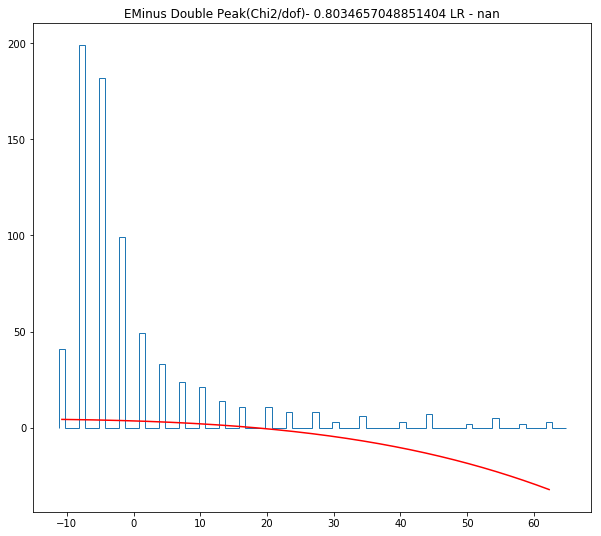

In [15]:
'''
plotting the histograms
'''

for i in range(50, 70):
#for i in select_file_num[10:40]:
    print(select_file_num[i])
    file_name = dataio.I3File('/data/p-one/akatil/step_5_medium_water/NuTau_NuE_20Events/step_5_'+str(select_file_num[i])+'_medium_water_custom_mDOM_recoPulse.i3.gz')
    #print('/data/p-one/akatil/step_5_medium_water/NuTau_NuE_20Events/step_5_'+str(select_file_num[i])+'_medium_water_custom_mDOM_recoPulse.i3.gz')
    frameList = []
    j = 0
    while(file_name.more()):
        frameList.append(file_name.pop_daq())
    frame_number = int(select_frame_num[i])
    frame_i = frameList[frame_number]
    mctree = frame_i["I3MCTree"]
    primary = mctree.primaries
    lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)    
    
    omkey = OMKey(int(select_string[i]), int(select_DOM[i]), 0)
    print(omkey)
    recoPulseMap = frame_i['I3RecoPulses']
    recoPulseList = recoPulseMap[omkey]
    recoPulse_timeList = np.array([recoPulse.time for recoPulse in recoPulseList])
    recoPulse_chargeList = np.array([recoPulse.charge for recoPulse in recoPulseList])
    
    '''
    Removing DOMs with hits less than 100 Hits
    '''
    if sum(recoPulse_chargeList) < 100:
        print(sum(recoPulse_chargeList))
        print('exit1')
        continue

    '''
    Calculating the mean and removing the tails
    '''

    #mean = recoPulse_timeList.mean()
    mean = sum(recoPulse_timeList*recoPulse_chargeList)/sum(recoPulse_chargeList) #mean is weighted
    select_time = recoPulse_timeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
    select_charge = recoPulse_chargeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
    #print('SELECT CHARGE', select_charge, select_time, mean, recoPulse_timeList, recoPulse_chargeList)

    if len(select_time) < 10:
        print('exit2')
        continue

    mean_select_time = sum(select_time*select_charge)/sum(select_charge)
    max_hitTimes = recoPulse_timeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]
    max_charge = recoPulse_chargeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]

    #[using zscore to remove the effect of outliers from the analysis]
    z = stats.zscore(max_hitTimes)
    max_hitTimes = max_hitTimes[(z>-1.6)&(z < 1.2)]
    max_charge = max_charge[(z>-1.6)&(z < 1.2)]

    if len(max_hitTimes) < 10:
        print('exit3')
        continue

    #Shifting mean to zero
    max_hitTimes_mean = sum(max_hitTimes*max_charge)/sum(max_charge)
    timestamps = max_hitTimes - max_hitTimes_mean
    final_mean = timestamps.mean()

    '''
    Histogramming the data from simulation
    '''
    print('Now Histogramming')
    bins = np.arange(min(timestamps), max(timestamps), 1)
    num, bin_edges = np.histogram(timestamps, bins=bins, weights=max_charge)
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
                    
    #removing bins with < 0 entries ---> Recommended for binned likelihood
    entries_in_bins = num[num > 0]
    bin_centers = bin_centers[num > 0]

    #Degrees of freedom should be greater than zero!
    if len(entries_in_bins) < 8:
        continue

    #Getting data for the chi2 fit
    chi2_entries_in_bins = entries_in_bins[entries_in_bins > 10]
    chi2_bin_centers = bin_centers[entries_in_bins > 10]

    num_dataPoints = len(entries_in_bins)
    area_data = sum(entries_in_bins)
    mean_entries = entries_in_bins.mean()

    '''
    Fitting bifurcated Gaussian and double bifurcated gaussian to
    the mcpe hit time distributions for both tau and electron.
    '''

    #Single Peak

    nll = lambda *args: log_likelihood_biGauss(*args)
    initial_biGauss = np.array([final_mean, 50, 5, max(entries_in_bins)])
    bnds_biGauss = ((min(bin_centers), max(bin_centers)), (0, 500), (0, 10), (0, 1e6))
    soln_biGauss = minimize(log_likelihood_biGauss, initial_biGauss,
                                    args=(entries_in_bins, bin_centers),
                                    method='Powell',
                                    bounds = bnds_biGauss)

    #Double Peak

    nll = lambda *args: log_likelihood_doublePeak(*args)
    initial_doublePeak = np.array([min(bin_centers)+10, 20, 1, max(entries_in_bins), final_mean, 20, 1, max(entries_in_bins)])
    bnds_doublePeak = ((min(bin_centers), final_mean), (0, 500), (0, 10), (0, 1e6),
                        (final_mean, max(bin_centers)), (0, 500), (0, 10), (0,1e6))
    soln_doublePeak = minimize(log_likelihood_doublePeak, initial_doublePeak,
                                args=(entries_in_bins, bin_centers),
                                method='Powell',
                                bounds=bnds_doublePeak)
    
    LR_biGauss = likelihood_ratio_biGauss(bin_centers, entries_in_bins, soln_biGauss.x[0],
                                              soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
    LR_doublePeak = likelihood_ratio_doublePeak(bin_centers, entries_in_bins, soln_doublePeak.x[0],
                                                    soln_doublePeak.x[1],soln_doublePeak.x[2],
                                                    soln_doublePeak.x[3], soln_doublePeak.x[4],
                                                    soln_doublePeak.x[5], soln_doublePeak.x[6],
                                                    soln_doublePeak.x[7])
    
    '''
    goodness of fit - Chi2 = 2*ln(LR)
    '''
    gof_DOM_biGauss = (2*LR_biGauss)/(num_dataPoints - 4)
    gof_DOM_doublePeak = (2*LR_doublePeak)/(num_dataPoints - 8)
    
    if gof_DOM_doublePeak != gof_DOM_doublePeak:
        print('PARAMETERS -', soln_doublePeak.x[0], soln_doublePeak.x[1],soln_doublePeak.x[2],
                                                    soln_doublePeak.x[3], soln_doublePeak.x[4],
                                                    soln_doublePeak.x[5], soln_doublePeak.x[6],
                                                    soln_doublePeak.x[7])
        
        def log_likelihood_doublePeak_test(theta, n, x):
            pos1, wid1, r1, amp1, pos2, wid2, r2, amp2 = theta
            model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
            L = model - (n*np.log(model))
            print('*****************Double Peak***************', int(i), omkey)
            print(theta, np.sum(L))
            return np.sum(L)
        
        
        soln_doublePeak_test = minimize(log_likelihood_doublePeak_test, initial_doublePeak,
                            args=(entries_in_bins, bin_centers),
                            method='Powell',
                            bounds=bnds_doublePeak)
    
        '''
        (x, y) values for the fit
        '''
        #x = bin_centers
        x = np.linspace(min(bin_centers), max(bin_centers), 1000)
        y_biGauss = biGauss(x, soln_biGauss.x[0],
                            soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
        y_doublePeak = double_peak(x, soln_doublePeak.x[0], soln_doublePeak.x[1],
                                        soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4],
                                        soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])
    
    
                    
        plt.figure(figsize=(10,9))
        _ = plt.hist(timestamps, bins=bins, weights=max_charge, histtype='step')
        #plt.plot(x, y_biGauss, '-', c = 'k')
        plt.plot(x, y_doublePeak, '-', c = 'r')
        plt.title(str(lepton.type) +' Double Peak(Chi2/dof)- '+ str(select_gof_dp[i])+' LR - '+str(gof_DOM_doublePeak))
        
        break

In [ ]:
# frame_in_file = select_frame_num[select_file_num == i]
    frame_number = 0
    for frame in file:
        for j in frame_in_file:
            if frame_number == int(j):
                mctree = frame["I3MCTree"]
                primary = mctree.primaries
                lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)
                
                recoPulseMap = frame['I3RecoPulses']
                select_string_in_frame = select_string[(select_file_num == i) & (select_frame_num == j)]
                
                for k in select_string_in_frame:
                    select_DOM_with_string = select_DOM[(select_file_num == i) & (select_frame_num == j) & (select_string == k)]
                    omkey = OMKey(int(k), int(select_DOM_with_string[0]), 0)
                    print('OMKEY', omkey)
                    print(num)
                    print(i, j, k, int(select_DOM_with_string[0]))
                    print(i, select_frame_num[num], select_string[num], select_DOM[num])
                    select_gof_DOM_biGauss = select_gof_biGauss[(select_file_num == i) & (select_frame_num == j) & (select_string == k)& (select_DOM == select_DOM_with_string[0])]
                    select_gof_DOM_dp = select_gof_dp[(select_file_num == i) & (select_frame_num == j) & (select_string == k)& (select_DOM == select_DOM_with_string[0])]
                    
                    recoPulseList = recoPulseMap[omkey]
                    recoPulse_timeList = np.array([recoPulse.time for recoPulse in recoPulseList])
                    recoPulse_chargeList = np.array([recoPulse.charge for recoPulse in recoPulseList])
                    
                    '''
                    Removing DOMs with hits less than 100 Hits
                    '''
                    if sum(recoPulse_chargeList) < 100:
                        print('exit1')
                        continue

                    '''
                    Calculating the mean and removing the tails
                    '''

                    #mean = recoPulse_timeList.mean()
                    mean = sum(recoPulse_timeList*recoPulse_chargeList)/sum(recoPulse_chargeList) #mean is weighted
                    select_time = recoPulse_timeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
                    select_charge = recoPulse_chargeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
                    #print('SELECT CHARGE', select_charge, select_time, mean, recoPulse_timeList, recoPulse_chargeList)

                    if len(select_time) < 10:
                        print('exit2')
                        continue

                    mean_select_time = sum(select_time*select_charge)/sum(select_charge)
                    max_hitTimes = recoPulse_timeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]
                    max_charge = recoPulse_chargeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]

                    #[using zscore to remove the effect of outliers from the analysis]
                    z = stats.zscore(max_hitTimes)
                    max_hitTimes = max_hitTimes[(z>-1.6)&(z < 1.2)]
                    max_charge = max_charge[(z>-1.6)&(z < 1.2)]

                    if len(max_hitTimes) < 10:
                        print('exit3')
                        continue

                    #Shifting mean to zero
                    max_hitTimes_mean = sum(max_hitTimes*max_charge)/sum(max_charge)
                    timestamps = max_hitTimes - max_hitTimes_mean
                    final_mean = timestamps.mean()

                    '''
                    Histogramming the data from simulation
                    '''
                    print('Now Histogramming')
                    bins = np.arange(min(timestamps), max(timestamps), 1)
                    num, bin_edges = np.histogram(timestamps, bins=bins, weights=max_charge)
                    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
                    
                    #removing bins with < 0 entries ---> Recommended for binned likelihood
                    entries_in_bins = num[num > 0]
                    bin_centers = bin_centers[num > 0]

                    #Degrees of freedom should be greater than zero!
                    if len(entries_in_bins) < 8:
                        continue

                    #Getting data for the chi2 fit
                    chi2_entries_in_bins = entries_in_bins[entries_in_bins > 10]
                    chi2_bin_centers = bin_centers[entries_in_bins > 10]

                    num_dataPoints = len(entries_in_bins)
                    area_data = sum(entries_in_bins)
                    mean_entries = entries_in_bins.mean()

                    '''
                    Fitting bifurcated Gaussian and double bifurcated gaussian to
                    the mcpe hit time distributions for both tau and electron.
                    '''

                    #Single Peak

                    nll = lambda *args: log_likelihood_biGauss(*args)
                    initial_biGauss = np.array([final_mean, 50, 5, max(entries_in_bins)])
                    bnds_biGauss = ((min(bin_centers), max(bin_centers)), (0, 500), (0, 10), (0, 1e6))
                    soln_biGauss = minimize(log_likelihood_biGauss, initial_biGauss,
                                            args=(entries_in_bins, bin_centers),
                                            method='Powell',
                                            bounds = bnds_biGauss)

                    #Double Peak

                    nll = lambda *args: log_likelihood_doublePeak(*args)
                    initial_doublePeak = np.array([min(bin_centers)+10, 20, 1, max(entries_in_bins), final_mean, 20, 1, max(entries_in_bins)])
                    bnds_doublePeak = ((min(bin_centers), final_mean), (0, 500), (0, 10), (0, 1e6),
                                        (final_mean, max(bin_centers)), (0, 500), (0, 10), (0,1e6))
                    soln_doublePeak = minimize(log_likelihood_doublePeak, initial_doublePeak,
                                                args=(entries_in_bins, bin_centers),
                                                method='Powell',
                                                bounds=bnds_doublePeak)
                    
                    '''
                    (x, y) values for the fit
                    '''
                    #x = bin_centers
                    x = np.linspace(min(bin_centers), max(bin_centers), 1000)
                    y_biGauss = biGauss(x, soln_biGauss.x[0],
                                            soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
                    y_doublePeak = double_peak(x, soln_doublePeak.x[0], soln_doublePeak.x[1],
                                                        soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4],
                                                        soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])
                    
                    plt.figure(figsize=(10,9))
                    _ = plt.hist(timestamps, bins=bins, weights=max_charge, histtype='step')
                    plt.plot(x, y_biGauss, '-', c = 'k')
                    plt.plot(x, y_doublePeak, '-', c = 'r')
                    plt.title(str(lepton.type)+' '+ str(select_gof_DOM_biGauss) +' '+ str(select_gof_DOM_dp))
                
            frame_number += 1    
    num += 1